In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = lambda x : 1 / x

In [3]:
dydt = lambda t, y : -5*t*y**2 + (5/t) - (1/t**2)

In [4]:
steps = [0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002]

In [5]:
err = lambda t, y: np.max(np.abs(f(t) - y))

# 4th Order Runge-Kutta

![](rk4.png)

In [6]:
def rk4(h):
    t = [1]
    y = [1]
    while t[-1] < 20:
        K1 = dydt(t[-1], y[-1])
        K2 = dydt(t[-1] + (h/2), y[-1] + (h/2)*K1)
        K3 = dydt(t[-1] + (h/2), y[-1] + (h/2)*K2)
        K4 = dydt(t[-1] + h, y[-1] + h*K3)
        
        t.append(t[-1] + h)
        y.append(y[-1] + (h/6)*(K1 + 2*K2 + 2*K3 + K4))
    return np.array(t), np.array(y)

In [7]:
errors_rk = [err(*rk4(h)) for h in steps]

# 2nd Order BDF Method

![](bdf.png)

In [8]:
def bdf2(h):
    t = [1]
    y = [1]
    while t[-1] < 20:
        y.append(y[-1] + (2/3)*h*dydt(t[-1], y[-1]))
        t.append(t[-1] + (2/3)*h)
    return np.array(t), np.array(y)

In [9]:
errors_bdf = [err(*bdf2(h)) for h in steps]

# Error Plots

In [10]:
e1 = lambda x : x**2
e2 = lambda x : x**4

In [11]:
x = np.linspace(0, 1, 100)

/usr/local/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/local/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


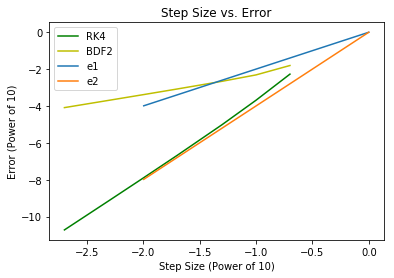

In [12]:
plt.title('Step Size vs. Error')
plt.plot(np.log10(steps), np.log10(errors_rk), color='g', label='RK4')
plt.plot(np.log10(steps), np.log10(errors_bdf), color='y', label='BDF2')
plt.plot(np.log10(x), np.log10(e1(x)), label='e1')
plt.plot(np.log10(x), np.log10(e2(x)), label='e2')
plt.xlabel('Step Size (Power of 10)')
plt.ylabel('Error (Power of 10)')
plt.legend()
plt.show()

# Order of Convergence

In [13]:
orders_rk = []
for i in range(1, len(steps)):
    p = np.log(errors_rk[i]/errors_rk[i-1])/np.log(steps[i-1]/steps[i])
    orders_rk.append(np.abs(p))
print(f'Computed P Values: {[f"{i:.2f}" for i in orders_rk]}')
print(f'Average Order of Convergence for RK4: {np.mean(orders_rk)}')

Computed P Values: ['4.71', '4.40', '4.18', '4.08', '4.04', '4.02']
Average Order of Convergence for RK4: 4.240085361972357


In [14]:
orders_bdf = []
for i in range(1, len(steps)):
    p = np.log(errors_bdf[i]/errors_bdf[i-1])/np.log(steps[i-1]/steps[i])
    orders_bdf.append(np.abs(p))
print(f'Computed P Values {[f"{i:.2f}" for i in orders_bdf]}')
print(f'Average Order of Convergence for BDF2: {np.mean(orders_bdf)}')

Computed P Values ['1.70', '1.15', '1.05', '1.02', '1.01', '1.00']
Average Order of Convergence for BDF2: 1.1551425257963093


# Conclusion

We expected RK4 to be higher order than BDF2 and based on the results it is. Also for the error plots, we see that the error disparity between RK4 and BDF2 is much larger for smaller step sizes which makes sense as well.

# Extra: Plots

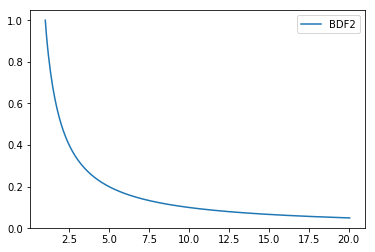

In [15]:
plt.plot(*bdf2(0.1), label='BDF2')
plt.legend()
plt.show()

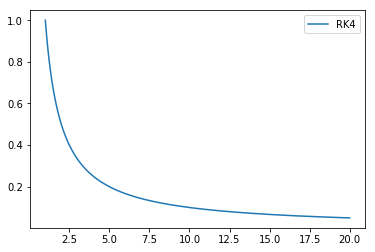

In [16]:
plt.plot(*rk4(0.1), label='RK4')
plt.legend()
plt.show()

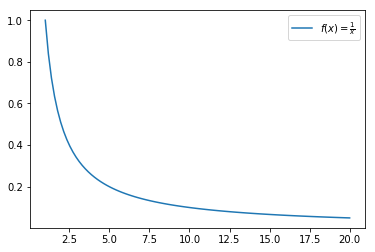

In [17]:
x = np.linspace(1, 20, 100)
plt.plot(x, f(x), label='$f(x) = \\frac{1}{x}$')
plt.legend()
plt.show()